# Environment Setting




In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**MUSE Download**

In [ ]:
%cd /content
!git clone https://github.com/facebookresearch/MUSE.git
%cd /content/MUSE/data
!chmod +x ./get_evaluation.sh
!./get_evaluation.sh

**FastText Download**

Actually, this process doesn't require FastText Module

In [3]:
%cd /content
!git clone https://github.com/facebookresearch/fastText.git
%cd /content/fastText
!pip install .
!make

/content
Cloning into 'fastText'...
remote: Enumerating objects: 3930, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 3930 (delta 29), reused 70 (delta 29), pack-reused 3854
Receiving objects: 100% (3930/3930), 8.33 MiB | 12.03 MiB/s, done.
Resolving deltas: 100% (2446/2446), done.
/content/fastText
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/fastText
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Using cached pybind11-2.9.2-py2.py3-none-any.whl (213 kB)
  Created wheel for fasttext: filename=fasttext

**GenSim Update**

In [4]:
!pip install gensim==3.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


# Gensim으로 학습시키기

**한국어**

In [1]:
# Load Ko Train Data
import pandas as pd
df = pd.read_csv('/content/train.csv')
df.sample(n=10)

,단어,문장
24088,뇌피셜,얘기다 당연히 유지 보수 팀 들어갔을 텐데 뇌피셜 순식간 오피셜 둔갑했다
99976,텅장,텅텅 이번 달 생활해야다 시부 랄 이번 달 라면 먹다다 긋다
72196,열폭,저분 머마 조롱다 늙다 추한 머마 쪽 감정 이입해서 독기 바싹 올라다 뿡 컴백하다 ...
39984,밀당,출근하다 책상 위 불 희망 건의서다 댓다 햇다 갈까다 고민하다 밥 먹다 불 희망 올...
57364,시강,유시진 강 모연 겁나다 시프 시강 명예로운 세상 최고 존 유시진 실력는 똑 쟁 이쁜...
104383,핑프,검 섹스 생활화합시다 땡땡 여기 라도 볼까다 땡땡 여기 검색했다 마땅한다 검색다다 ...
53378,새피,흙수저들 피 방가자 너 마음 밝다 빛나는 미소 날 기쁘다 해 고맙다는 마디 언제나 ...
54743,서순,떠 괴 독사 빙 덫 빙 덫 독사 떠 괴 차이 남
50755,빤쓰런,했다해 이러다 간 봄 백신 맞은 날 열나다 팔다 픈 당연히 방송다 쉬다 예상했다 욕...
13104,금수저,서초동 아크 비스타 억쯤 한다는데 윤석열 대통령 금수저 임 공무원 월급 사다


In [2]:
# Format Ko Train Data
train_data_set = []
for item in df['문장']:
  train_data_set.append(item.split())

In [3]:
# Load Pre-Trained Fasttext Ko Model
K_BIN_FILEPATH = '/content/drive/MyDrive/Dataset/fasttext_kr+jp_vec/wiki.ko.bin'  # Your Pre-Trained Ko Bin File Path

from gensim.models.fasttext import FastText
model = FastText.load_fasttext_format(K_BIN_FILEPATH)
print("학습 전 단어 개수:",len(model.wv.vocab))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  """


단어 개수: 879129


In [4]:
# Train
model.build_vocab(train_data_set,update=True)
model.train(train_data_set,
            total_examples=len(train_data_set),
            epochs=4,
            sg=1,
            hs=1,
            min_count = 10,
            negative=5)
            # max_n=4,
            # min_n=2)
print("학습 후 단어 개수:",len(model.wv.vocab))

In [9]:
# check result
model.wv.most_similar('극혐하다',topn=20)

[('극혐다는', 0.9466115236282349),
 ('극혐다', 0.9421252608299255),
 ('극혐었다', 0.938910722732544),
 ('극혐하는', 0.9291719198226929),
 ('좆하다', 0.9215878248214722),
 ('비하다다', 0.9198418855667114),
 ('극혐다다', 0.9197578430175781),
 ('극다다', 0.9190905094146729),
 ('지랄들다다', 0.9190633296966553),
 ('편들다다', 0.9147567749023438),
 ('저러다다', 0.9141643047332764),
 ('새끼하다', 0.9128611087799072),
 ('열폭하다다', 0.9123315811157227),
 ('꺼하다', 0.9121983051300049),
 ('여혐다', 0.911865234375),
 ('봐도다다', 0.9112060070037842),
 ('쎄하다', 0.910847008228302),
 ('똥다다', 0.9104267358779907),
 ('지랄하는다', 0.9100860953330994),
 ('지랄들다', 0.90993732213974)]

In [10]:
# save as word2vec format
model.wv.save_word2vec_format('/content/ko.vec')

**일본어**

In [23]:
# Load and Format Ja Train Data
with open('/content/train.txt','r',encoding='utf-8') as f:
  ja_train = [x.replace('\n','') for x in f.readlines()]

ja_train = [x.split() for x in ja_train if None not in x.split()]
print('총 개수:',len(ja_train))
print(ja_train[303])

총 개수: 25351
['歳', 'おじさん', '言わたら', 'さくら', 'くんどうだ', 'いくら', 'イケボで', '許さん']


In [17]:
# Load Pre-Trained Fasttext Ja Model
J_BIN_FILEPATH = '/content/drive/MyDrive/Dataset/fasttext_kr+jp_vec/ja_model.bin'

from gensim.models.fasttext import FastText
model = FastText.load_fasttext_format(J_BIN_FILEPATH)
print("학습 전 단어 개수:",len(model.wv.vocab))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  """


단어 개수: 92056


In [19]:
# Train
model.build_vocab(ja_train,update=True)
model.train(
    ja_train,
    total_examples=len(ja_train),
    epochs=3,
    sg=1,
    hs=1,
    negative=5)
print("학습 후 단어 개수:",len(model.wv.vocab))

In [25]:
# check result
model.wv.most_similar('ドン引き',topn=10)

[('ドン引きた', 0.894601583480835),
 ('な！', 0.7690287232398987),
 ('塩対応', 0.7671898007392883),
 ('既読無視', 0.7569005489349365),
 ('変な', 0.7478957176208496),
 ('女に', 0.7410510778427124),
 ('嫌いな', 0.739199161529541),
 ('行ったら', 0.7384121417999268),
 ('どゆこと', 0.7324457168579102),
 ('猫被り', 0.7308180332183838)]

In [15]:
# save as word2vec format
model.wv.save_word2vec_format('/content/ja.vec')

# Facebook - MUSE

Before MUSE, Please Put the dictionary file in /content/MUSE/data/crosslingual/dictionaries directory

In [27]:
%cd /content/MUSE

/content/MUSE


In [134]:
!python supervised.py --src_lang ko --tgt_lang ja --max_vocab 100000 --src_emb /content/ko.vec --tgt_emb /content/drive/MyDrive/Dataset/fasttext_kr+jp_vec/ja.vec --n_refinement 5 --dico_train identical_char

Impossible to import Faiss library!! Switching to standard nearest neighbors search implementation, this will be significantly slower.

INFO - 06/18/22 09:31:42 - 0:00:00 - ============ Initialized logger ============
INFO - 06/18/22 09:31:42 - 0:00:00 - cuda: True
                                     dico_build: S2T&T2S
                                     dico_eval: default
                                     dico_max_rank: 10000
                                     dico_max_size: 0
                                     dico_method: csls_knn_10
                                     dico_min_size: 0
                                     dico_threshold: 0
                                     dico_train: identical_char
                                     emb_dim: 300
                                     exp_id: 
                                     exp_name: debug
                                     exp_path: /content/MUSE/dumped/debug/ie1ky68hln
                                     exp

# Validate Cross-Lingual Embeddings

In [ ]:
!python evaluate.py --src_lang ko --tgt_lang ja --src_emb /content/MUSE/dumped/debug/s0lhux76qw/vectors-ko.txt --tgt_emb /content/MUSE/dumped/debug/s0lhux76qw/vectors-ja.txt --max_vocab 100000

# Loading word embeddings

In [31]:
import io
import numpy as np

In [32]:
def load_vec(emb_path, nmax=50000):
    vectors = []
    word2id = {}
    with io.open(emb_path, 'r', encoding='utf-8', newline='\n', errors='ignore') as f:
        next(f)
        for i, line in enumerate(f):
            word, vect = line.rstrip().split(' ', 1)
            vect = np.fromstring(vect, sep=' ')
            assert word not in word2id, 'word found twice'
            vectors.append(vect)
            word2id[word] = len(word2id)
            if len(word2id) == nmax:
                break
    id2word = {v: k for k, v in word2id.items()}
    embeddings = np.vstack(vectors)
    return embeddings, id2word, word2id

In [41]:
src_path = '/content/MUSE/dumped/debug/s0lhux76qw/vectors-ko.txt'
# src_path = '/content/drive/MyDrive/Dataset/ko-ja made/vectors-ko.txt'
tgt_path = '/content/MUSE/dumped/debug/s0lhux76qw/vectors-ja.txt'
# tgt_path = '/content/drive/MyDrive/Dataset/ko-ja made/vectors-ja.txt'
nmax = 100000  # maximum number of word embeddings to load

src_embeddings, src_id2word, src_word2id = load_vec(src_path, nmax)
tgt_embeddings, tgt_id2word, tgt_word2id = load_vec(tgt_path, nmax)

#Get nearest neighbors And Smililarity Between two words



In [34]:
def get_nn(word, src_emb, src_id2word, tgt_emb, tgt_id2word, K=5):
    print("Nearest neighbors of \"%s\":" % word)
    word2id = {v: k for k, v in src_id2word.items()}
    word_emb = src_emb[word2id[word]]
    scores = (tgt_emb / np.linalg.norm(tgt_emb, 2, 1)[:, None]).dot(word_emb / np.linalg.norm(word_emb))
    k_best = scores.argsort()[-K:][::-1]
    for i, idx in enumerate(k_best):
        print('%.4f - %s' % (scores[idx], tgt_id2word[idx]))

In [35]:
def get_similarity(word1, word2, src_emb, src_id2word, tgt_emb, tgt_id2word):
    print("Similarity between \"%s\" and \"%s\":" % (word1,word2),end=" ")
    word2id1 = {v: k for k, v in src_id2word.items()}
    word1_emb = src_emb[word2id1[word1]]
    word2id2 = {v: k for k, v in tgt_id2word.items()}
    word2_emb = tgt_emb[word2id2[word2]]
    scores = (word2_emb / np.linalg.norm(word2_emb)).dot(word1_emb / np.linalg.norm(word1_emb))
    print(round(scores,4))

In [37]:
# printing similarity between source word and target word
src_word = '남자'
tgt_word = '男'
get_similarity(src_word, tgt_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word)

Similarity between "남자" and "男": 0.491


In [42]:
# src -> src
src_word = '백수'
get_nn(src_word, src_embeddings, src_id2word, src_embeddings, src_id2word, K=10)

Nearest neighbors of "백수":
1.0000 - 백수
0.7699 - 혼자다
0.7590 - 벌다다
0.7558 - 다니다다
0.7546 - 취준생다
0.7494 - 부럽다
0.7466 - 너다
0.7458 - 할꺼다
0.7445 - 흙수저다
0.7432 - 차리다


In [48]:
# src -> tgt
src_word = '가스라이팅'
get_nn(src_word, src_embeddings, src_id2word, tgt_embeddings, tgt_id2word, K=10)

Nearest neighbors of "가스라이팅":
0.5985 - 言いなり
0.5819 - 勘違い
0.5795 - 決めつけ
0.5772 - 反論
0.5757 - 批判
0.5747 - ばれる
0.5741 - 心変わり
0.5738 - 責める
0.5730 - 思い込ん
0.5725 - ディスる


In [ ]:
# tgt -> src
tgt_word = '親ガチャ'
get_nn(tgt_word,tgt_embeddings,tgt_id2word,src_embeddings,src_id2word,K=10)

In [127]:
# tgt -> tgt
tgt_word = 'ガチャ'
get_nn(tgt_word,tgt_embeddings,tgt_id2word,tgt_embeddings,tgt_id2word,K=10)

Nearest neighbors of "ガチャ":
1.0000 - ガチャ
0.6207 - ガチャガチャ
0.5468 - レアアイテム
0.5395 - アイテム
0.5392 - ガチャポン
0.5381 - アイテム課金
0.5226 - ゲーム内
0.5088 - 課金
0.5040 - レアカード
0.4914 - 仮想通貨


# Visualize multilingual embeddings

In [124]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True)  # TSNE(n_components=2, n_iter=3000, verbose=2)
pca.fit(np.vstack([src_embeddings, tgt_embeddings]))
print('Variance explained: %.2f' % pca.explained_variance_ratio_.sum())

Variance explained: 0.10


In [128]:
import matplotlib.pyplot as plt


def plot_similar_word(src_words, src_word2id, src_emb, tgt_words, tgt_word2id, tgt_emb, pca):

    Y = []
    word_labels = []
    for label, sw in src_words.items():
        Y.append(src_emb[src_word2id[sw]])
        word_labels.append(label)
    for label, tw in tgt_words.items():
        Y.append(tgt_emb[tgt_word2id[tw]])
        word_labels.append(label)

    # find tsne coords for 2 dimensions
    Y = pca.transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # display scatter plot
    plt.figure(figsize=(10, 8), dpi=80)
    plt.scatter(x_coords, y_coords, marker='x')

    for k, (label, x, y) in enumerate(zip(word_labels, x_coords, y_coords)):
        color = 'blue' if k < len(src_words) else 'red'  # src words in blue / tgt words in red
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=19,
                     color=color, weight='bold')

    plt.xlim(x_coords.min() - 0.2, x_coords.max() + 0.2)
    plt.ylim(y_coords.min() - 0.2, y_coords.max() + 0.2)
    plt.title('Visualization of the multilingual word embedding space')

    plt.show()

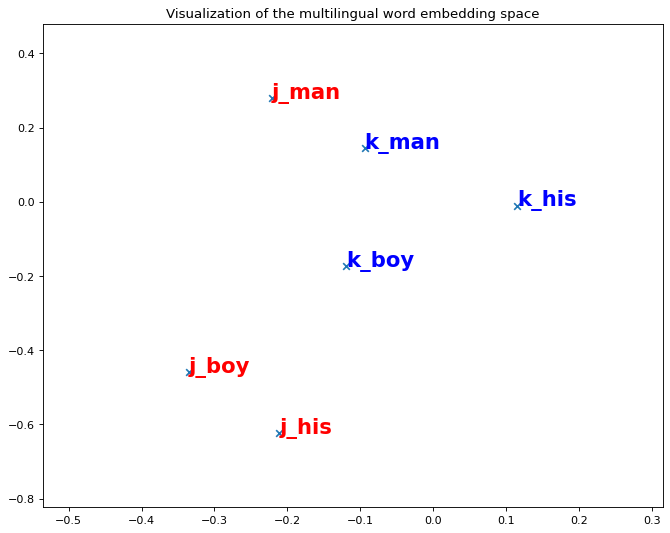

In [130]:
# get 5 random input words
src_words = {'k_man':'남자','k_his':'역사','k_boy':'소년'}
tgt_words = {'j_man':'男子','j_his':'歴史','j_boy':'少年'}
# assert words in dictionaries
for sw in src_words.values():
    assert sw in src_word2id, '"%s" not in source dictionary' % sw
for tw in tgt_words.values():
    assert tw in tgt_word2id, '"%s" not in target dictionary' % sw

plot_similar_word(src_words, src_word2id, src_embeddings, tgt_words, tgt_word2id, tgt_embeddings, pca)